In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
col_val = ['O3', 'SO2', 'H2S', 'IAQ', 'CO', 'EtOH', 'RESP', 'NO2']

In [7]:
control = pd.read_csv('data/control3.csv', header=None, names=col_val)
lux = pd.read_csv('data/lux.csv', header=None, names=col_val)
shokubutsu = pd.read_csv('data/shokubutsu.csv', header=None, names=col_val)

In [8]:
control['target'] = 'control'
lux['target'] = 'lux'
shokubutsu['target'] = 'shokubutsu'

In [9]:
df = pd.concat([control, lux, shokubutsu])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [16]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
train_df = pd.concat([X_train, y_train], axis=1)
train_df.to_csv('soap_train.csv',index=False, header=False)

In [25]:
X_test.to_csv('soap_test.csv', index=False, header=False)

In [14]:
#logistic model 
log_mod = LogisticRegression(max_iter=3000)
log_mod.fit(X_train, y_train)
log_pred = log_mod.predict(X_test)

In [15]:
print(metrics.classification_report(y_test, log_pred))
print(metrics.confusion_matrix(y_test, log_pred))

              precision    recall  f1-score   support

     control       0.98      0.78      0.87        58
         lux       1.00      0.97      0.99        74
  shokubutsu       0.81      0.98      0.89        66

    accuracy                           0.92       198
   macro avg       0.93      0.91      0.91       198
weighted avg       0.93      0.92      0.92       198

[[45  0 13]
 [ 0 72  2]
 [ 1  0 65]]


In [26]:
score = []
k_range = range(1, 40)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test, y_pred))

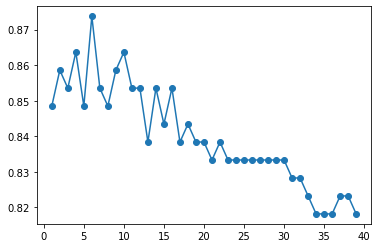

In [27]:
plt.plot(k_range, score, '-o')

In [28]:
score.index(max(score))

5

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


In [30]:
print(metrics.classification_report(y_test, knn_pred))
print(metrics.confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

     control       0.94      0.53      0.68        58
         lux       1.00      0.99      0.99        74
  shokubutsu       0.70      0.97      0.81        66

    accuracy                           0.85       198
   macro avg       0.88      0.83      0.83       198
weighted avg       0.88      0.85      0.84       198

[[31  0 27]
 [ 0 73  1]
 [ 2  0 64]]


In [36]:
report = metrics.classification_report(y_test, knn_pred)
conf_mat = metrics.confusion_matrix(y_test, knn_pred)

print(f"Classification report is:\n{report}")
print(f"Confusion matrix:\n{conf_mat}")

Classification report is:
              precision    recall  f1-score   support

     control       0.94      0.53      0.68        58
         lux       1.00      0.99      0.99        74
  shokubutsu       0.70      0.97      0.81        66

    accuracy                           0.85       198
   macro avg       0.88      0.83      0.83       198
weighted avg       0.88      0.85      0.84       198

Confusion matrix:
[[31  0 27]
 [ 0 73  1]
 [ 2  0 64]]
